# BigMart Sales Prediction: Analysis & Feature Engineering

## Project Overview
This notebook presents a complete analysis and modeling approach for the BigMart Sales Prediction challenge.

## Approach
1. Exploratory Data Analysis
2. Feature Engineering 
3. Model Testing
4. Performance Optimization

## Expected Outcome
- Insights into BigMart sales patterns
- Robust set of engineered features
- High-performing predictive model
- Clear methodology documentation

## 1. Data Loading and Initial Overview

Loading the data and understanding the basic structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Starting BigMart Sales Prediction Analysis")

# Load the datasets
print("Loading datasets...")
try:
    train_data = pd.read_csv('../data/train.csv')
    test_data = pd.read_csv('../data/test.csv')
    print("Data loaded successfully")
except:
    train_data = pd.read_csv('../../Data/Train/train.csv')
    test_data = pd.read_csv('../../Data/Test/test.csv')
    print("Data loaded successfully")

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Total features: {train_data.shape[1] - 1}")

/opt/anaconda3/envs/V3_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Starting BigMart Sales Prediction Analysis
Loading datasets...
Data loaded successfully
Training data shape: (8523, 12)
Test data shape: (5681, 11)
Total features: 11


In [2]:
print("Training Data Info:")
print(train_data.info())

print("First 5 rows of training data:")
display(train_data.head())

print("Basic statistics:")
display(train_data.describe())

print(f"Unique outlets: {train_data['Outlet_Identifier'].nunique()}")
print(f"Unique items: {train_data['Item_Identifier'].nunique()}")

print("Data Types:")
print(train_data.dtypes)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
First 5 rows of trai

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Basic statistics:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Unique outlets: 10
Unique items: 1559
Data Types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


## 2. Exploratory Data Analysis

Understanding data patterns and relationships.

Target Variable: Item_Outlet_Sales Analysis
Mean: 2,181.29
Median: 1,794.33
Standard Deviation: 1,706.50
Min: 33.29
Max: 13,086.96
Skewness: 1.18


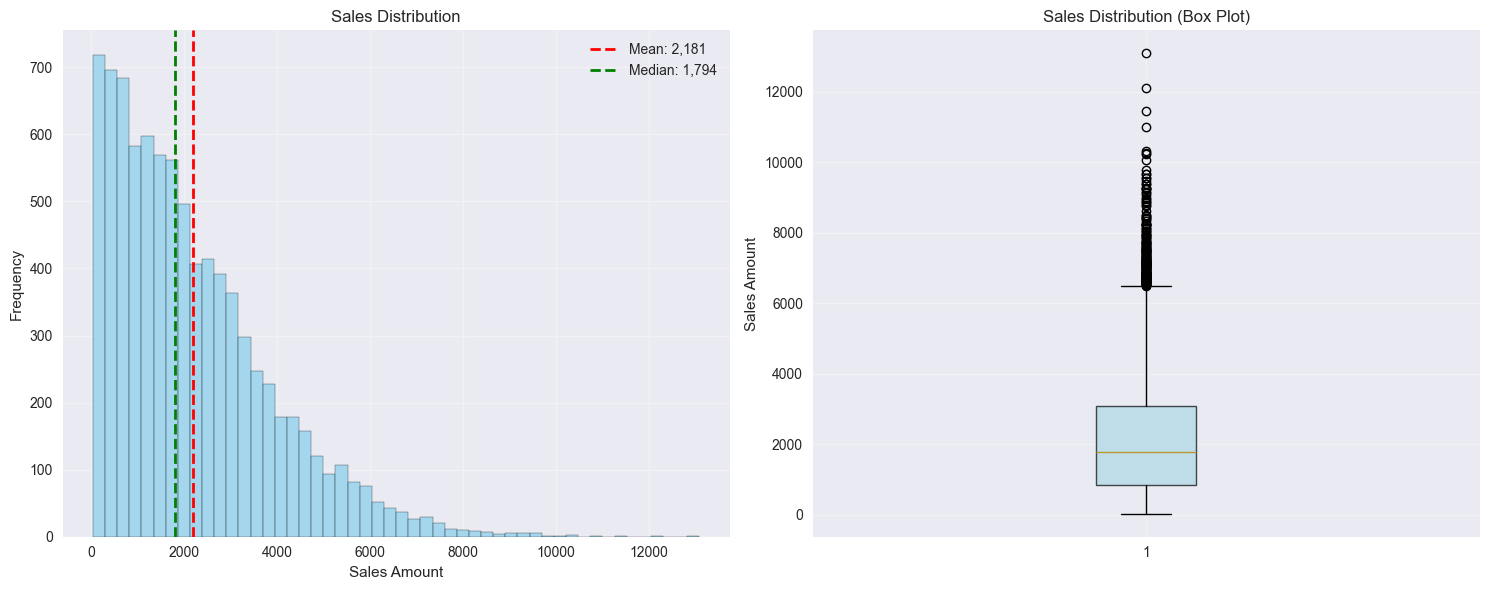

Sales are right-skewed (skewness = 1.18)
Most products sell between 834 - 3,101


In [3]:
print("Target Variable: Item_Outlet_Sales Analysis")

sales = train_data['Item_Outlet_Sales']
print(f"Mean: {sales.mean():,.2f}")
print(f"Median: {sales.median():,.2f}")
print(f"Standard Deviation: {sales.std():,.2f}")
print(f"Min: {sales.min():,.2f}")
print(f"Max: {sales.max():,.2f}")
print(f"Skewness: {sales.skew():.2f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axes[0].hist(sales, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(sales.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sales.mean():,.0f}')
axes[0].axvline(sales.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {sales.median():,.0f}')
axes[0].set_title('Sales Distribution')
axes[0].set_xlabel('Sales Amount')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(sales, vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_title('Sales Distribution (Box Plot)')
axes[1].set_ylabel('Sales Amount')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Sales are right-skewed (skewness = {sales.skew():.2f})")
print(f"Most products sell between {sales.quantile(0.25):,.0f} - {sales.quantile(0.75):,.0f}")

Creating Comprehensive EDA Dashboard


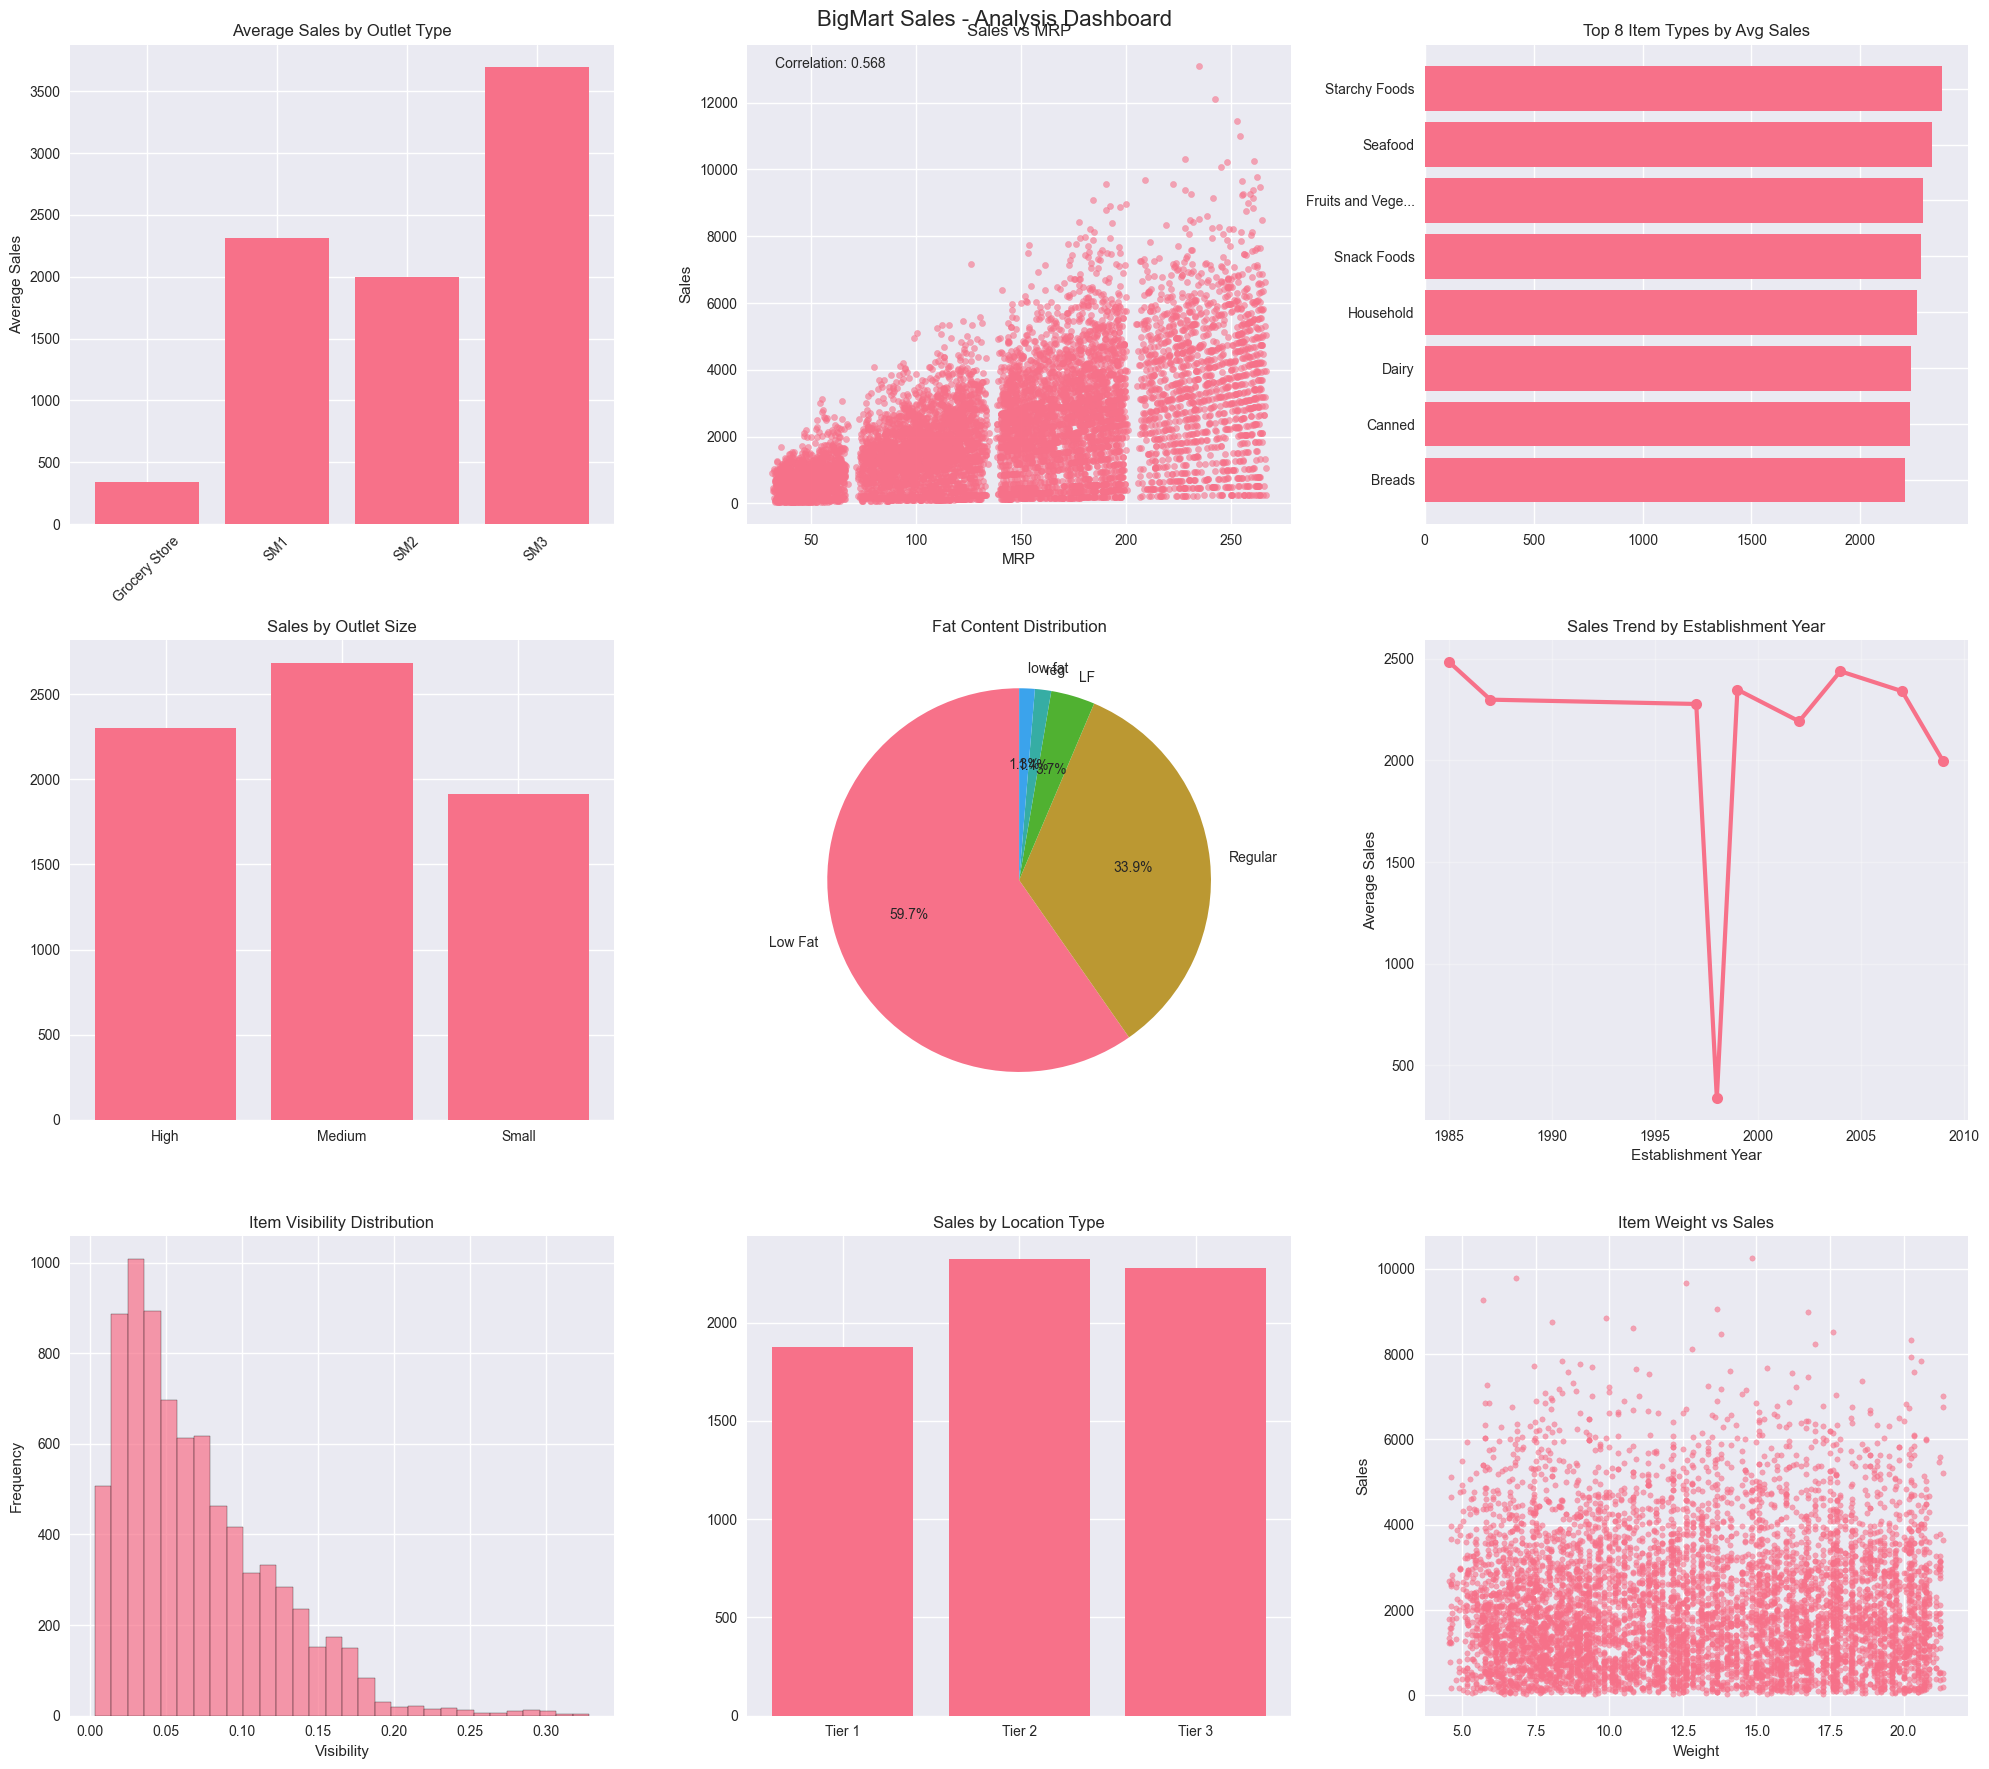

Key Insights:
- Supermarket Type1 has highest average sales
- Strong positive correlation between MRP and Sales
- Medium-sized outlets perform best


In [4]:
print("Creating Comprehensive EDA Dashboard")

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('BigMart Sales - Analysis Dashboard', fontsize=16, y=0.98)

# Sales by Outlet Type
outlet_sales = train_data.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['mean', 'count'])
ax1 = axes[0,0]
bars = ax1.bar(range(len(outlet_sales)), outlet_sales['mean'])
ax1.set_title('Average Sales by Outlet Type')
ax1.set_xticks(range(len(outlet_sales)))
ax1.set_xticklabels([t.replace('Supermarket Type', 'SM') for t in outlet_sales.index], rotation=45)
ax1.set_ylabel('Average Sales')

# Sales vs MRP Relationship
ax2 = axes[0,1]
ax2.scatter(train_data['Item_MRP'], train_data['Item_Outlet_Sales'], alpha=0.6, s=20)
ax2.set_title('Sales vs MRP')
ax2.set_xlabel('MRP')
ax2.set_ylabel('Sales')
corr = train_data['Item_MRP'].corr(train_data['Item_Outlet_Sales'])
ax2.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax2.transAxes)

# Top Item Types by Sales
ax3 = axes[0,2] 
top_items = train_data.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=True).tail(8)
ax3.barh(range(len(top_items)), top_items.values)
ax3.set_title('Top 8 Item Types by Avg Sales')
ax3.set_yticks(range(len(top_items)))
ax3.set_yticklabels([name[:15] + '...' if len(name) > 15 else name for name in top_items.index])

# Sales by Outlet Size
ax4 = axes[1,0]
size_sales = train_data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().dropna()
ax4.bar(size_sales.index, size_sales.values)
ax4.set_title('Sales by Outlet Size')

# Fat Content Distribution
ax5 = axes[1,1]
fat_counts = train_data['Item_Fat_Content'].value_counts()
ax5.pie(fat_counts.values, labels=fat_counts.index, autopct='%1.1f%%', startangle=90)
ax5.set_title('Fat Content Distribution')

# Establishment Year Trend
ax6 = axes[1,2]
year_trend = train_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
ax6.plot(year_trend.index, year_trend.values, marker='o', linewidth=3, markersize=8)
ax6.set_title('Sales Trend by Establishment Year')
ax6.set_xlabel('Establishment Year')
ax6.set_ylabel('Average Sales')
ax6.grid(True, alpha=0.3)

# Item Visibility Analysis
ax7 = axes[2,0]
vis_data = train_data[train_data['Item_Visibility'] > 0]['Item_Visibility']
ax7.hist(vis_data, bins=30, alpha=0.7, edgecolor='black')
ax7.set_title('Item Visibility Distribution')
ax7.set_xlabel('Visibility')
ax7.set_ylabel('Frequency')

# Sales by Location Type
ax8 = axes[2,1]
location_sales = train_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
ax8.bar(location_sales.index, location_sales.values)
ax8.set_title('Sales by Location Type')

# Weight vs Sales
ax9 = axes[2,2]
weight_data = train_data.dropna(subset=['Item_Weight'])
ax9.scatter(weight_data['Item_Weight'], weight_data['Item_Outlet_Sales'], alpha=0.6, s=15)
ax9.set_title('Item Weight vs Sales')
ax9.set_xlabel('Weight')
ax9.set_ylabel('Sales')

plt.tight_layout()
plt.show()

print("Key Insights:")
print("- Supermarket Type1 has highest average sales")
print("- Strong positive correlation between MRP and Sales")
print("- Medium-sized outlets perform best")

## 3. Missing Value Analysis and Treatment

Analyzing and handling missing data systematically.

Missing Value Summary:
        Column  Missing_Count  Missing_Percentage
8  Outlet_Size           2410           28.276428
1  Item_Weight           1463           17.165317


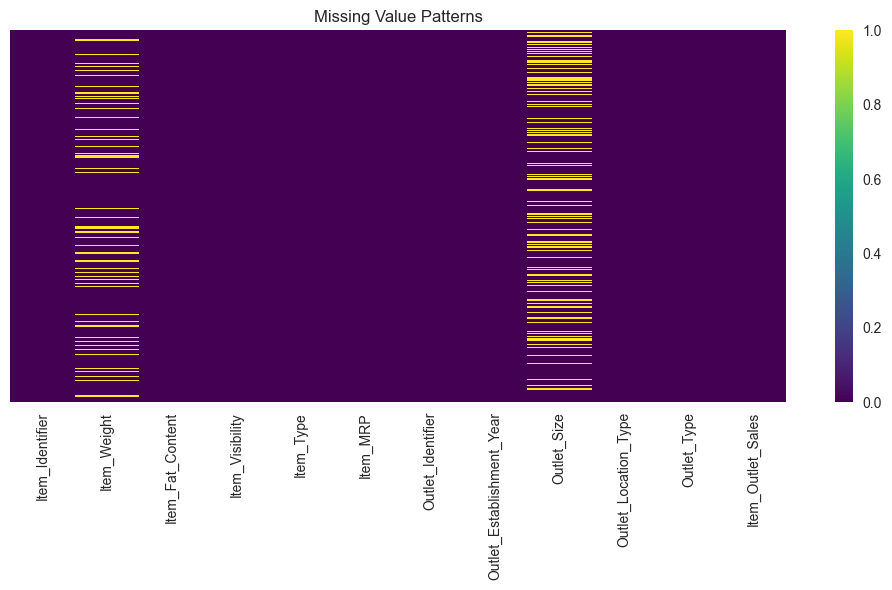

In [6]:
# Check missing values
missing_data = train_data.isnull().sum()
missing_percent = (missing_data / len(train_data)) * 100

missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("Missing Value Summary:")
print(missing_summary)

# Visualize missing patterns
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Value Patterns')
plt.tight_layout()
plt.savefig('outputs/missing_value_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

In [7]:
# Handle missing values in Item_Weight
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)

# Handle missing values in Outlet_Size
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

print("Missing values after treatment:")
print(train_data.isnull().sum())

Missing values after treatment:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


## 4. Data Distribution Analysis

Analyzing the distribution of key variables.

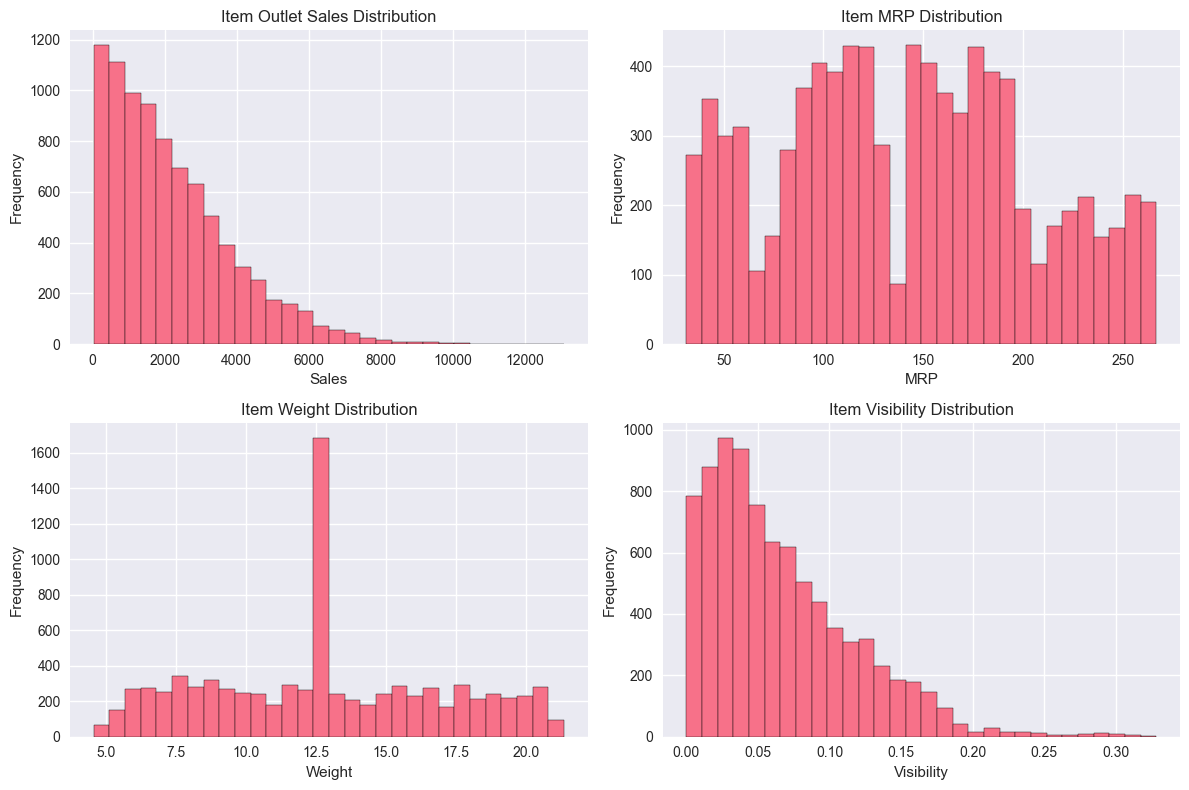

In [9]:
# Target variable distribution
plt.figure(figsize=(12, 8))

# Item_Outlet_Sales distribution
plt.subplot(2, 2, 1)
plt.hist(train_data['Item_Outlet_Sales'], bins=30, edgecolor='black')
plt.title('Item Outlet Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Item_MRP distribution
plt.subplot(2, 2, 2)
plt.hist(train_data['Item_MRP'], bins=30, edgecolor='black')
plt.title('Item MRP Distribution')
plt.xlabel('MRP')
plt.ylabel('Frequency')

# Item_Weight distribution
plt.subplot(2, 2, 3)
plt.hist(train_data['Item_Weight'], bins=30, edgecolor='black')
plt.title('Item Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Item_Visibility distribution
plt.subplot(2, 2, 4)
plt.hist(train_data['Item_Visibility'], bins=30, edgecolor='black')
plt.title('Item Visibility Distribution')
plt.xlabel('Visibility')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('outputs/distribution_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Categorical Variable Analysis

Analyzing categorical variables and their relationship with sales.

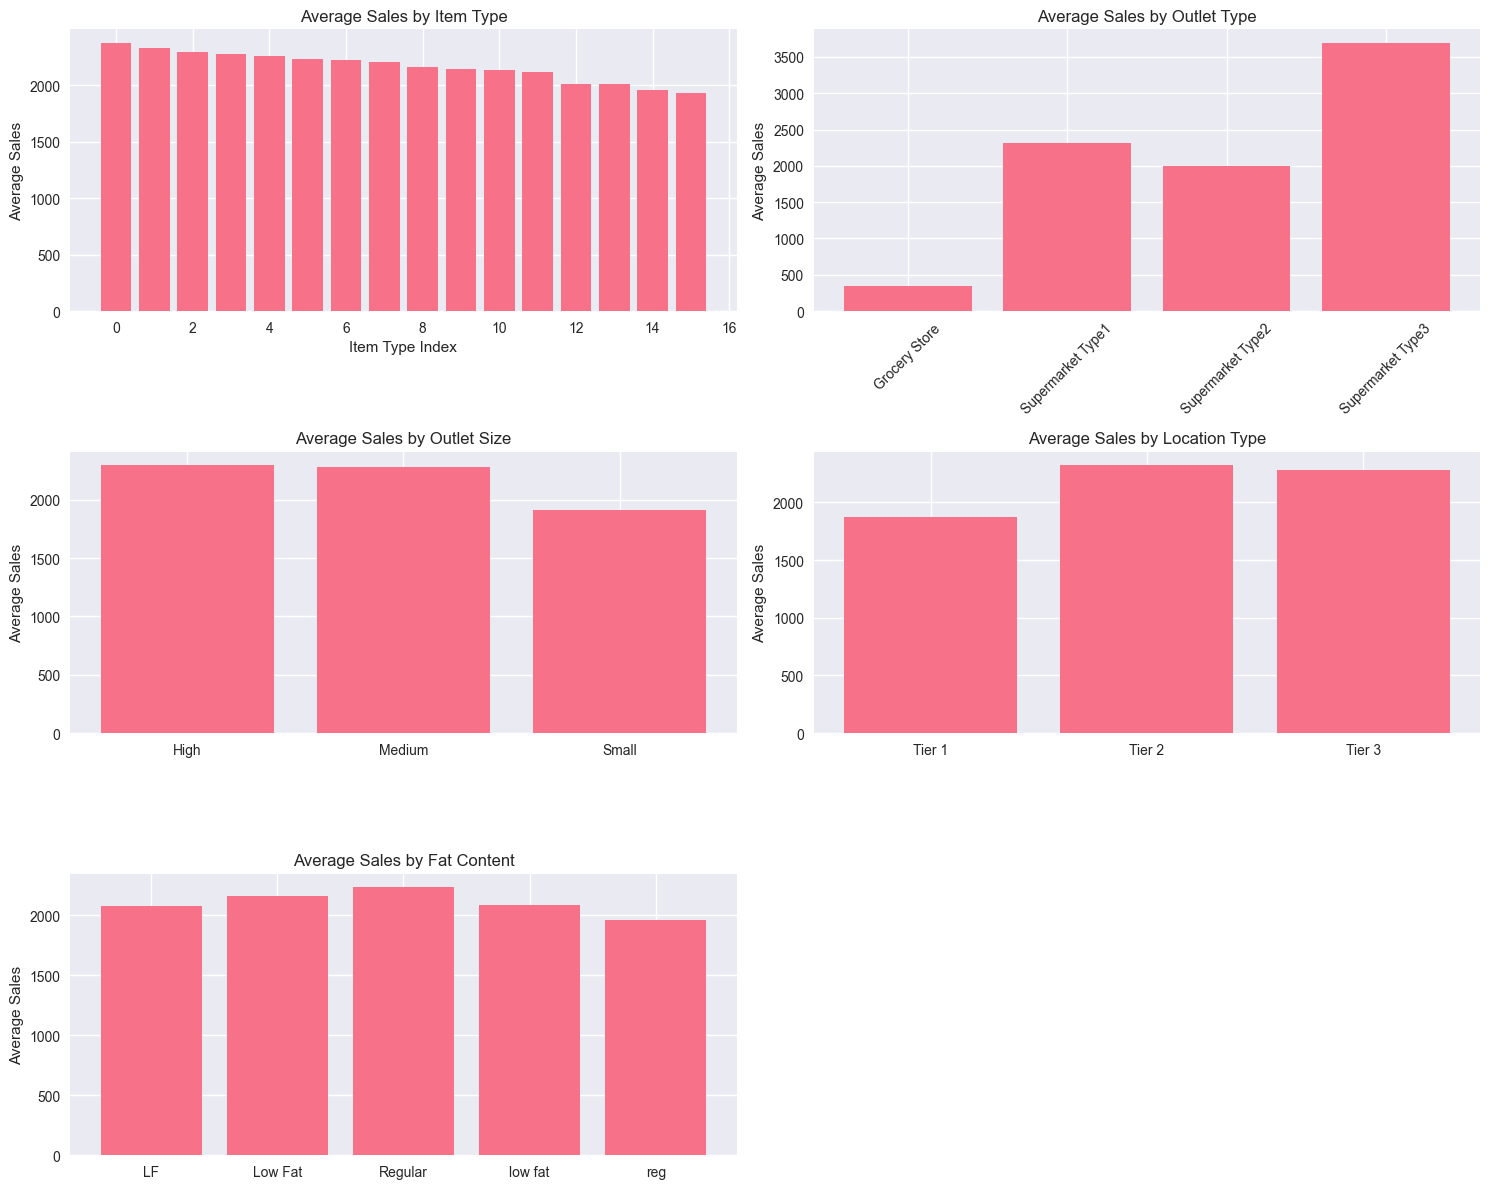

In [11]:
# Categorical variable analysis
plt.figure(figsize=(15, 12))

# Item_Type analysis
plt.subplot(3, 2, 1)
item_type_sales = train_data.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
plt.bar(range(len(item_type_sales)), item_type_sales.values)
plt.title('Average Sales by Item Type')
plt.xlabel('Item Type Index')
plt.ylabel('Average Sales')

# Outlet_Type analysis
plt.subplot(3, 2, 2)
outlet_type_sales = train_data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
plt.bar(outlet_type_sales.index, outlet_type_sales.values)
plt.title('Average Sales by Outlet Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Outlet_Size analysis
plt.subplot(3, 2, 3)
outlet_size_sales = train_data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
plt.bar(outlet_size_sales.index, outlet_size_sales.values)
plt.title('Average Sales by Outlet Size')
plt.ylabel('Average Sales')

# Outlet_Location_Type analysis
plt.subplot(3, 2, 4)
location_type_sales = train_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
plt.bar(location_type_sales.index, location_type_sales.values)
plt.title('Average Sales by Location Type')
plt.ylabel('Average Sales')

# Item_Fat_Content analysis
plt.subplot(3, 2, 5)
fat_content_sales = train_data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
plt.bar(fat_content_sales.index, fat_content_sales.values)
plt.title('Average Sales by Fat Content')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.savefig('outputs/categorical_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Feature Engineering

Creating new features and transforming existing ones.

In [12]:
# Feature engineering
# 1. Extract outlet age
train_data['Outlet_Age'] = 2024 - train_data['Outlet_Establishment_Year']

# 2. Create item category from Item_Identifier
train_data['Item_Category'] = train_data['Item_Identifier'].str[:2]

# 3. Standardize Item_Fat_Content
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# 4. Create price per weight ratio
train_data['Price_per_Weight'] = train_data['Item_MRP'] / train_data['Item_Weight']

# 5. Visibility bins
train_data['Visibility_Bin'] = pd.cut(train_data['Item_Visibility'], 
                                     bins=3, 
                                     labels=['Low', 'Medium', 'High'])

print("Feature engineering completed.")
print(f"New features created: {['Outlet_Age', 'Item_Category', 'Price_per_Weight', 'Visibility_Bin']}")
print(f"Dataset shape after feature engineering: {train_data.shape}")

Feature engineering completed.
New features created: ['Outlet_Age', 'Item_Category', 'Price_per_Weight', 'Visibility_Bin']
Dataset shape after feature engineering: (8523, 16)
